In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot,draw_correlation_scatter
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
import seaborn as sns
import random
from scipy.stats import pearsonr

from pop_organize import get_sample_data, get_sample_with_dfs
from SufficientStatistics import *
from MyFunctionsShani import *


done4


In [2]:
import time
cdate=str(time.strftime("%d%m%Y"))
cdate

'27072017'

# calculating ins2 probs

In [ ]:
def genIns2seqDF(sample_name):
    from Bio.Seq import Seq
    sample_df=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/%s.tsv" %sample_name) 
    sample_df_non_prod = sample_df[sample_df['sequenceStatus'] != 'In']
    seqList=list(sample_df_non_prod['nucleotide'])
    n2IndexList=list(sample_df_non_prod['n2Index'])
    jIndexList=list(sample_df_non_prod['jIndex'])
    n2InsSeqList=[]
    n2lengthList=[]
    #seqListShort=seqList[:5]
    for n, seq in enumerate(seqList):
        n2Index=n2IndexList[n]
        jIndex=jIndexList[n]
        if n2Index==-1 or jIndex==-1:
            continue

        n2InsSeqRev=Seq(seq[n2Index:jIndex])
        n2InsSeq=n2InsSeqRev.reverse_complement()
        n2InsSeq=''.join(n2InsSeq)
        n2InsSeqList.append(n2InsSeq)
        n2lengthList.append(len(n2InsSeq))
        
    n2seq_df=pd.DataFrame({'sequence': n2InsSeqList, 'length':n2lengthList})
    return n2seq_df


# Comparing ins1 and ins2 probs (sample 09122)

In [ ]:
print n1seq_df[:20]

In [ ]:
print n2seq_df[:20]

In [ ]:
sample_name='HIP09122'
n1seq_df=genIns1seqDF(sample_name)

In [ ]:
sample_name='HIP09122'
n2seq_df=genIns2seqDF(sample_name)

In [ ]:
seqList1=list(n1seq_df['sequence'])
dinuc_norm_df1=gen_dinucNormDF(seqList1)

In [ ]:
seqList2=list(n2seq_df['sequence'])
dinuc_norm_df2=gen_dinucNormDF(seqList2)

In [ ]:
print dinuc_norm_df1

In [ ]:
print dinuc_norm_df2[:4]

In [ ]:
nt1NormFreq1=gen_nt1FreqsDict(seqList1)

In [ ]:
nt1NormFreq2=gen_nt1FreqsDict(seqList2)

In [ ]:
print nt1NormFreq1

In [ ]:
print nt1NormFreq2

In [ ]:
lengthCount1=calc_length_prob(n1seq_df)
lengthCount1

In [ ]:
lengthCount2=calc_length_prob(n2seq_df)
lengthCount2

In [ ]:

lengthCount1=lengthCount1.sort_index()
lengthCount2=lengthCount2.sort_index()

y1=list(lengthCount1)
y2=list(lengthCount2)

x1=list(lengthCount1.index)
x2=list(lengthCount2.index)

print x1
print x2

In [ ]:
lengthCount1df= pd.DataFrame(lengthCount1)
lengthCount2df= pd.DataFrame(lengthCount2)

lengthCountMerge=pd.merge(lengthCount1df,lengthCount2df, how='outer', right_index=True, left_index=True)
lengthCountMerge.index.rename('length', inplace=True)
lengthCountMerge.rename(columns={'length_x':'ins1Prob','length_y':'ins2Prob'} , inplace=True) 


lengthCountMerge


In [ ]:
x=lengthCountMerge['ins1Prob']
y=lengthCountMerge['ins2Prob']
r,p=MyPearsonr(x,y)

fig, ax = plt.subplots()
lengthCountMerge.plot(kind='bar', color=['blue', 'red'],ax=ax,figsize=(14,5),
                      title='Ins1 and Ins2 length distributions\nPearsonR=%.3f, p-value=%.6f' %(r,p))

#plt.text(0.01,0.99,"r=%.4f p=%.4f" %(r,p), transform=axB.transAxes, verticalalignment = 'top', ha = 'left',fontsize=14,color='red')

plt.show()

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/Ins1Ins2LengthDists'
fig.savefig(filename, bbox_inches='tight', dpi = 200)

In [ ]:
a_1=list(dinuc_norm_df1.loc['A',:])
a_1

In [ ]:
a_1=list(dinuc_norm_df1.loc['A',:])
a_2=list(dinuc_norm_df2.loc['A',:])

c_1=list(dinuc_norm_df1.loc['C',:])
c_2=list(dinuc_norm_df2.loc['C',:])

g_1=list(dinuc_norm_df1.loc['G',:])
g_2=list(dinuc_norm_df2.loc['G',:])

t_1=list(dinuc_norm_df1.loc['T',:])
t_2=list(dinuc_norm_df2.loc['T',:])

In [ ]:
x_list=['A','C','G','T']

In [ ]:
a_1

In [ ]:
fig1, (ax1,ax2,ax3,ax4)= plt.subplots(nrows=4,ncols=1,figsize=(3,12),sharex=True,sharey=True)
fig1.suptitle('Dinucleotide frequencies-Ins1 vs. Ins2\np-value=n.s. (chi square)', fontsize=14)

xlabel='1st nt'
legend=['ins1','ins2']
axList=[ax1,ax2,ax3,ax4]
y1List=[a_1,c_1,g_1,t_1]
y2List=[a_2,c_2,g_2,t_2]
ylabelList=['A','C','G','T']

xticks1=[0.9,1.9,2.9,3.9]
xticks2=[1.1,2.1,3.1,4.1]
xtickslabels=['','A','C','G','T']
width=0.2


for n in range(4):
    ax=axList[n]
    ax.bar(xticks1,y1List[n],width=width,color='blue')
    ax.bar(xticks2,y2List[n],width=width,color='red')
    ax.legend(legend)
    ax.set_ylabel(ylabelList[n]+' (2nd nt)', fontsize=16)
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.grid(b=False)
    ax.set_xlim(0,5)
    ax.set_ylim(0,0.5)
    ax.set_xticklabels(xtickslabels,ha='center',fontsize=14)
    ax.set_yticklabels([0,0.1,0.2,0.3,0.4,''])

fig1.subplots_adjust(top=0.94, bottom=0.06, hspace=0)
fig1.text(0.5, 0.02, '1st nt', ha='center')

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/dinucFreqsCorrelationsIns1Ins2'
fig1.savefig(filename, bbox_inches='tight', dpi = 200)


    
plt.show()



    

#### plt.show()

In [ ]:
chisq,p=stats.chisquare(f_obs=dinuc_norm_df1, f_exp=dinuc_norm_df2)

In [ ]:
nt1NormFreq1

In [ ]:
y1=nt1NormFreq1.values()
y1

In [ ]:
y2=nt1NormFreq2.values()
y2

In [ ]:
fig1, ax= plt.subplots()
plt.title('1st nt frequencies-Ins1 vs. Ins2\np-value=n.s. (chi square)', fontsize=16)

xlabel='1st nt'
legend=['ins1','ins2']


xticks1=[0.9,1.9,2.9,3.9]
xticks2=[1.1,2.1,3.1,4.1]
xtickslabels=['','A','C','G','T']
width=0.2


 
ax.bar(xticks1,y1,width=width,color='blue')
ax.bar(xticks2,y2,width=width,color='red')
ax.legend(legend)
ax.set_ylabel('Frequency', fontsize=16)
#ax.axhline(0, color='black')
#ax.axvline(0, color='black')
ax.grid(b=False)
ax.set_xlim(0,5)
ax.set_ylim(0,0.5)
ax.set_xticklabels(xtickslabels,ha='left',fontsize=14)
#ax.set_yticklabels([0,0.1,0.2,0.3,0.4,''])
ax.set_xlabel('1st nt',fontsize=14)

#fig1.subplots_adjust(top=0.94, bottom=0.06, hspace=0)
#fig1.text(0.5, 0.02, '1st nt', ha='center')

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/nt1NormFreqIns1Ins2'
fig1.savefig(filename, bbox_inches='tight', dpi = 200)


    
plt.show()

In [ ]:
chisq,p=stats.chisquare(f_obs=y1, f_exp=y2)

In [ ]:
print p

In [ ]:
%%time
chisq,p=stats.chisquare(f_obs=y1, f_exp=y2)


# running ins2 calculations on many samles:

since all my slots in the cluster are full, I send a run with a few samples here:

In [4]:
import time
cdate=str(time.strftime("%d%m%Y"))
cdate

threshLength=20
sample_list=['HIP13505','HIP14071','HIP13518','HIP01091','HIP01197','HIP03228','HIP10377','HIP13427']
train_fraction_list=[0.8,0.5]
  
samplesList=[]
sampleLengthList=[]
TrainFracsList=[]
rExpToObsCorrelList=[]
pExpToObsCorrelList=[]
figExpToObsCorrelList=[]
axExpToObsCorrelList=[]       

fig1, ((ax1, ax3,ax5,ax7),(ax2,ax4,ax6,ax8))= plt.subplots(nrows=2,ncols=4,figsize=(13,5),sharex=True,sharey=True)
fig1.suptitle('Ins2 sequence frequency - correlation between expected and observed values', fontsize=18)
axList=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
count=0


for sample_name in sample_list:
    for train_fraction in train_fraction_list:
        print sample_name
        print train_fraction
        if count<8:
            axB=axList[count]
        else:
            axB=None
        figExpToObsCorrel,axExpToObsCorrel,rExpToObsCorrel,pExpToObsCorrel,sample_length=calc_plot_save_modelParamPrediction(
            sample_name,2,threshLength,train_fraction,axB)
        samplesList.append(sample_name)
        sampleLengthList.append(sample_length)
        TrainFracsList.append(train_fraction)
        rExpToObsCorrelList.append(rExpToObsCorrel)
        pExpToObsCorrelList.append(pExpToObsCorrel)
        figExpToObsCorrelList.append(figExpToObsCorrel)
        axExpToObsCorrelList.append(axExpToObsCorrel)
        count+=1

fig1.subplots_adjust(left=0.09, right=0.98, top=0.84, wspace=0.08,hspace=0.32)
fig1.text(0.5, 0.02, 'Expected Frequency (log10)', ha='center')
fig1.text(0.02, 0.5, 'Observed Frequency (log10)', va='center', rotation='vertical')
ins2predictionStrengthDF=pd.DataFrame({'Sample': samplesList, '# nonProd unique seqeunces':sampleLengthList,
                                      'train set fraction':TrainFracsList, 
                                       'expected to observed frequency correlation r':rExpToObsCorrelList,
                                      'expected to observed frequency correlation p':pExpToObsCorrelList})


figFile='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/Prediction_Correlation_Examples_ins2_ %s' %cdate
fig1.savefig(figFile, dpi=300)        
        
## saving the correct Reg table to pickles and excel:

with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/exp_and_obs_freqs_ins2_dfs/ins2predictionStrengthDF_%s' %cdate,"wb" ) as f:
    pickle.dump(ins2predictionStrengthDF,f)
f.close()


writer='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/exp_and_obs_freqs_ins2_dfs/ins2predictionStrengthDF_%s.xlsx' %cdate
ins2predictionStrengthDF.to_excel(writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True)## saving the correct Reg table to pickles and excel:


HIP13505
0.8
step1: generate data sets and count parameter frequencies...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
step2: compare predicted and observed...
step 3: plotting....
HIP13505
0.5
step1: generate data sets and count parameter frequencies...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
step2: compare predicted and observed...
step 3: plotting....
HIP14071
0.8
step1: generate data sets and count parameter frequencies...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
step2: compare predicted and observed...
step 3: plotting....


/usr/wisdom/python/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


HIP14071
0.5
step1: generate data sets and count parameter frequencies...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
step2: compare predicted and observed...
step 3: plotting....
HIP13518
0.8
step1: generate data sets and count parameter frequencies...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
step2: compare predicted and observed...
step 3: plotting....
HIP13518
0.5
step1: generate data sets and count parameter frequencies...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
step2: compare predicted and observed...
step 3: plotting....
HIP01091
0.8
step1: generate data sets and count parameter frequencies...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
step2: compare predicted and observed...
step 3: plotting....
HIP01091
0.5
step1: generate data sets and count

In [6]:
file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/exp_and_obs_freqs_ins1_dfs/ins1predictionStrengthDF.xlsx' 
ins1predictionStrengthDF=pd.read_excel(file1)
ins1predictionStrengthDF.head()

,# nonProd unique seqeunces,Sample,expected to observed frequency correlation p,expected to observed frequency correlation r,train set fraction
0,8400,HIP13505,1.049509e-07,0.404235,0.8
1,8400,HIP13505,4.995783e-19,0.399624,0.5
2,18148,HIP14071,3.808762e-19,0.471197,0.8
3,18148,HIP14071,1.675009e-43,0.464630,0.5
4,28695,HIP13518,1.672392e-30,0.484092,0.8


In [9]:
ins1ins2PredictionWithinSamplesCorrelationsPartial=pd.merge(ins1predictionStrengthDF,ins2predictionStrengthDF, how='outer',
                                                    left_index=True, right_index=True)

In [10]:
ins1ins2PredictionWithinSamplesCorrelationsPartial

,# nonProd unique seqeunces_x,Sample_x,expected to observed frequency correlation p_x,expected to observed frequency correlation r_x,train set fraction_x,# nonProd unique seqeunces_y,Sample_y,expected to observed frequency correlation p_y,expected to observed frequency correlation r_y,train set fraction_y
0,8400,HIP13505,1.049509e-07,0.404235,0.8,8150,HIP13505,1.878363e-06,0.356114,0.8
1,8400,HIP13505,4.995783e-19,0.399624,0.5,8150,HIP13505,6.103845e-15,0.378565,0.5
2,18148,HIP14071,3.808762e-19,0.471197,0.8,17481,HIP14071,4.274128e-20,0.493134,0.8
3,18148,HIP14071,1.675009e-43,0.464630,0.5,17481,HIP14071,2.114515e-34,0.433012,0.5
4,28695,HIP13518,1.672392e-30,0.484092,0.8,28162,HIP13518,3.029053e-07,0.229107,0.8
5,28695,HIP13518,1.859601e-61,0.463093,0.5,28162,HIP13518,3.819747e-22,0.269408,0.5
6,48500,HIP01091,1.337372e-59,0.544891,0.8,46778,HIP01091,2.648184e-55,0.519380,0.8
7,48500,HIP01091,5.324516e-124,0.511947,0.5,46778,HIP01091,2.005294e-81,0.435430,0.5
8,49988,HIP01197,6.832518e-48,0.487091,0.8,48380,HIP01197,4.009822e-54,0.508652,0.8
9,49988,HIP01197,3.410554e-102,0.462884,0.5,48380,HIP01197,1.740706e-86,0.441987,0.5


In [12]:
ins1ins2PredictionWithinSamplesCorrelationsPartial=ins1ins2PredictionWithinSamplesCorrelationsPartial.rename(columns={'expected to observed frequency correlation r_x':'expected to observed frequency correlation r_ins2',
    'expected to observed frequency correlation r_y':'expected to observed frequency correlation r_ins1',
    'expected to observed frequency correlation p_x':'expected to observed frequency correlation p_ins2',
    'expected to observed frequency correlation p_y':'expected to observed frequency correlation p_ins1'})

In [14]:
ins1ins2PredictionWithinSamplesCorrelationsPartial.drop(['Sample_y','train set fraction_y'], axis=1,inplace=True)

In [15]:
ins1ins2PredictionWithinSamplesCorrelationsPartial=ins1ins2PredictionWithinSamplesCorrelationsPartial.rename(columns={
    '# nonProd unique seqeunces_x':'# ins2 sequences','Sample_x':'Sample', 'train set fraction_x':'train set fraction',
    '# nonProd unique seqeunces_y': '# ins1 sequences'})

In [18]:
ins1ins2PredictionWithinSamplesCorrelationsPartial.set_index('Sample', inplace=True)

In [19]:
ins1ins2PredictionWithinSamplesCorrelationsPartial

,# ins2 sequences,expected to observed frequency correlation p_ins2,expected to observed frequency correlation r_ins2,train set fraction,# ins1 sequences,expected to observed frequency correlation p_ins1,expected to observed frequency correlation r_ins1
Sample,,,,,,,
HIP13505,8400,1.049509e-07,0.404235,0.8,8150,1.878363e-06,0.356114
HIP13505,8400,4.995783e-19,0.399624,0.5,8150,6.103845e-15,0.378565
HIP14071,18148,3.808762e-19,0.471197,0.8,17481,4.274128e-20,0.493134
HIP14071,18148,1.675009e-43,0.464630,0.5,17481,2.114515e-34,0.433012
HIP13518,28695,1.672392e-30,0.484092,0.8,28162,3.029053e-07,0.229107
HIP13518,28695,1.859601e-61,0.463093,0.5,28162,3.819747e-22,0.269408
HIP01091,48500,1.337372e-59,0.544891,0.8,46778,2.648184e-55,0.519380
HIP01091,48500,5.324516e-124,0.511947,0.5,46778,2.005294e-81,0.435430
HIP01197,49988,6.832518e-48,0.487091,0.8,48380,4.009822e-54,0.508652


In [20]:
writer='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/ins1ins2PredictionWithinSamplesCorrelationsPartial_%s.xlsx' %cdate
ins1ins2PredictionWithinSamplesCorrelationsPartial.to_excel(writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True)## saving the correct Reg table to pickles and excel:

In [30]:
def calcR_and_DrawScatter_ins1ins2withinSamplesCalcCorrel():
    #file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1PredictionAllSamples/expObsFreqDF_%s_Leave1Out' %sample_name
    #expObsFreqDF_Leave1Out=pd.read_pickle(file1)
    from MyFunctionsShani import *
    
    fig,axB=plt.subplots()
    #strTrainFrac='None'
    import time
    cdate=str(time.strftime("%d%m%Y"))
    cdate

    ins1ins2PredictionWithinSamplesCorrelationsPartial08=ins1ins2PredictionWithinSamplesCorrelationsPartial[ins1ins2PredictionWithinSamplesCorrelationsPartial['train set fraction']==0.8]

    df=ins1ins2PredictionWithinSamplesCorrelationsPartial08
    x_var = 'expected to observed frequency correlation r_ins1'
    y_var = 'expected to observed frequency correlation r_ins2'
    filename = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/ins1ins2coorel_withinSamplesCalc_partial' 
    figExpToObsCorrel, axExpToObsCorrel, rExpToObsCorrel, pExpToObsCorrel = draw_correlation_scatter(df[x_var], df[y_var], figsize=(4, 4),
                             xticks=None, yticks=None, \
                                 xlim=None, ylim=None, r='pearson', ms=4, logd=False, \
                                 xlab='ins1 r', ylab='ins2 r', filename=filename,
                                 title='ins1-ins2 crorelations\nWithin Samples Calculation method\nTrain set fraction=0.8, partial' ,
                                 color="b", alpha=0.8, grid=True, dpi=300, xticklabels=None,
                                add_identity=True, contour=False, axB=axB)
    fig.savefig(filename, dpi=80)
    

<ipython-input-30-cac9ca436f83>:1: SyntaxWarning: import * only allowed at module level
  def calcR_and_DrawScatter_ins1ins2withinSamplesCalcCorrel():


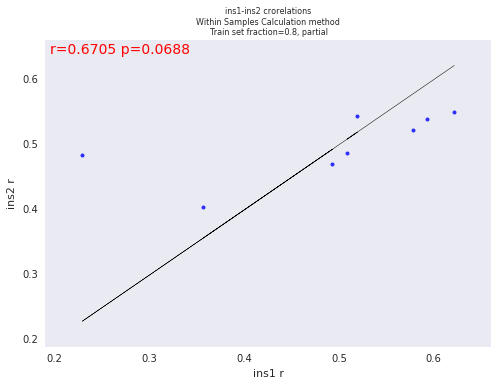

In [31]:
calcR_and_DrawScatter_ins1ins2withinSamplesCalcCorrel()
plt.show()

In [32]:
dfs_folder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins2PredictionAllSamples/calc_predictionPower_allSamples'
ins2Prediction_withinSamples_6samples=concat_summarizing_dfs(dfs_folder)

number of dfs in directory: 2
the length of df list is 2


In [33]:
ins2Prediction_withinSamples_6samples

,# nonProd unique seqeunces,Sample,expected to observed frequency correlation p,expected to observed frequency correlation r,train set fraction
0,46347,HIP09122,2.090904e-72,0.592958,0.8
1,25918,HIP12091,1.318628e-50,0.632267,0.8
2,54373,HIP13710,7.611624e-68,0.544207,0.8
0,60340,HIP11513,1.957375e-112,0.655948,0.8
1,28586,HIP08200,2.374693e-29,0.477660,0.8
2,30625,HIP00769,1.662862e-28,0.462537,0.8


In [ ]:
dfs_folder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins2PredictionAllSamples/calc_predictionPower_allSamples'
ins2Prediction_withinSamples_6samples=concat_summarizing_dfs(dfs_folder)